In [5]:
#représentation des differents objects que nous allons manipuler. 
#l'individu
#x=s,nb_chr,nb_mut
#la population 
#POP={x1,x2,...,xi,...xn}
#p est la probabilité d'avoir de mâles
p=0.5
pop=25

In [67]:
import random
def generateursex(p): 
    r=random.random()
    if (r%100)<p:
        return 'F'
    else: 
        return 'M'

In [68]:
print(generateursex(0.5) )

F


In [69]:
def generateurmonde(pop):
    E={}
    for i in range(pop):
        E[i]=(generateursex(p),23,0)
    return E

In [71]:
print(generateurmonde(pop))

{0: ('F', 23, 0), 1: ('M', 23, 0), 2: ('F', 23, 0), 3: ('M', 23, 0), 4: ('M', 23, 0), 5: ('M', 23, 0), 6: ('F', 23, 0), 7: ('F', 23, 0), 8: ('M', 23, 0), 9: ('F', 23, 0), 10: ('M', 23, 0), 11: ('M', 23, 0), 12: ('M', 23, 0), 13: ('F', 23, 0), 14: ('M', 23, 0), 15: ('F', 23, 0), 16: ('M', 23, 0), 17: ('F', 23, 0), 18: ('F', 23, 0), 19: ('M', 23, 0), 20: ('F', 23, 0), 21: ('M', 23, 0), 22: ('F', 23, 0), 23: ('F', 23, 0), 24: ('F', 23, 0)}


In [72]:
E={0: ('F', 23, 0), 1: ('M', 23, 0), 2: ('F', 23, 0), 3: ('M', 23, 0), 4: ('M', 23, 0), 5: ('M', 23, 0), 6: ('F', 23, 0), 7: ('F', 23, 0), 8: ('M', 23, 0), 9: ('F', 23, 0), 10: ('M', 23, 0), 11: ('M', 23, 0), 12: ('M', 23, 0), 13: ('F', 23, 0), 14: ('M', 23, 0), 15: ('F', 23, 0), 16: ('M', 23, 0), 17: ('F', 23, 0), 18: ('F', 23, 0), 19: ('M', 23, 0), 20: ('F', 23, 0), 21: ('M', 23, 0), 22: ('F', 23, 0), 23: ('F', 23, 0), 24: ('F', 23, 0)}

In [73]:
print(E[0])

('F', 23, 0)


In [83]:
import numpy as np 
import matplotlib.pyplot as plt
l=5
c=5
def tab(l,c,E):
    A=np.zeros((l,c))
    k=0
    for i in range(l):
        for j in range(c):
            if E[k][0]=='F':
                A[i][j]=1
                k=k+1
            else:
                A[i][j]=-1
                k=k+1
            
    return A

In [84]:
print(tab(l,c,E))

[[ 1. -1.  1. -1. -1.]
 [-1.  1.  1. -1.  1.]
 [-1. -1. -1.  1. -1.]
 [ 1. -1.  1.  1. -1.]
 [ 1. -1.  1.  1.  1.]]


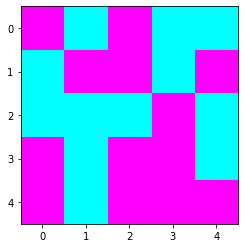

In [96]:
plt.imshow(tab(l,c,E), cmap='cool')
plt.show()


In [121]:
def enfants(F,M):
    New_E={}
    sf,nb_chrf,nb_mutf=F
    sm,nb_chrm,nb_mutm=M
    New_E[0]=(generateursex(p), nb_chrf, random.choice([nb_mutf,nb_mutm]))
    New_E[1]=(generateursex(p), nb_chrf, random.choice([nb_mutf,nb_mutm]))
    return New_E 

In [122]:
print(enfants(E[0],E[1]))

{0: ('F', 23, 0), 1: ('F', 23, 0)}
